<a href="https://colab.research.google.com/github/itimes-digital/quarentena-dados-alura/blob/master/QuarentenaDados_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Olá seja bem-vinda e bem-vindo ao notebook da **aula 02**, desça até o conteúdo da aula 02 e bons estudos (Se clicar na seta antes do título Aula 01 ela comprime todo o conteúndo da aula 1, deixando o layout mais agradavél).

**Não esqueça de rodar todos as células de códigos da aula 01, antes de iniciar a aula 02**

#Aula 01



Nós estaremos desenvolvendo nosso projeto aqui no google colaboratory, assim podemos mesclar células contendo textos em formato markdown e células de código, além disso você não precisar instalar nada na sua máquina. Então que tal começar testando algumas linhas de código.

Nesta primeira célula estamos realizando um ```print()```, lembre-se que esta função python imprime a string que estamos passando como parâmetro, então  o retorno é exibido logo abaixo da célula com código.

In [0]:
print("Guilherme Silveira")
print("Paulo Silveira")

Guilherme Silveira
Paulo Silveira


Agora vamos analisar a proxima célula de código. 

Aqui estamos fazendo uma atribuição de variável, conforme dito em aula, as atribuições não tem retorno, assim, diferente da célula anterior não temos um *output* logo abaixo do código.

In [0]:
nome_do_filme = "Totoro, o filme"

Agora que criamos a variável ```nome_do_filme```, podemos reutilizá-la, por exemplo na função ```print```, para assim imprimir a *string* "Totoro, o filme".

In [0]:
print(nome_do_filme)

Totoro, o filme


In [0]:
nome_do_filme

'Totoro, o filme'

## Lendo os dados do MovieLens

Nosso primeiro passo foi conhecer e realizar um "hello-world" no colab, agora chegou a hora de importar os dados para o notebook e começar as análises.

Vamos importar a biblioteca [pandas](https://pandas.pydata.org/), um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ```pd.read_csv()```.

Estamos lendo um arquivo **CSV** (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ```pd.read_excel()``` que lê arquivos **xlsx** entre diversos outros formatos, você pode encontrar mais informações na seção de [input/output da documentação](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método ```filmes.head()``` para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método ```filmes.sample()```, se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (```filmes.sample(5)```). 

In [0]:
import pandas as pd

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar algumas dúvidas mais simples? 

Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um **?** na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos.

In [0]:
# lendo a documentação de um método/atributo

?filmes.head

In [0]:
# lendo a documentação do tipo (docstring)

?filmes

A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações. 

Agora vamos analisar um pouco melhor o dataset de avaliações.

In [4]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para visualizar algumas linhas estamos usando o ```.head()```, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. Para descobrir a "forma" dos nossos dados podemos utilizar o ```avaliacoes.shape```, retornando uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python), onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [0]:
avaliacoes.shape

(100836, 4)

In [0]:
len(avaliacoes)

100836

Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas. 

usarioId => ID para para usuário que votou em determinado filme.

filmeId => ID para identificar um filme votado.

nota => A nota dada para pelo usuário para o respectivo filme.

momento => A data da votação que não está formatada como data

Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos, mas repare que nas 5 primeiras linhas temos o filme **1, 3, 6, 47, 50**. Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?



In [5]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do **filmeId 1** é chamando o método ```avaliacaoes.query("filmeId==1")```, esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

Tendo as informações do **filmeId 1** podemos chamar o ```avaliacoes_do_filme_1.describe()```, para analisar as estatítiscas gerais dos dados.

In [6]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [8]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do **filmeId 1**.

In [0]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Calculamos as estatísicas apenas para o **filmeId 1**, mas também podemos chamar o método ```.describe()``` para a base completa (avaliacões).

In [9]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Ok, nós calculamos um tanto de coisa usando `.describe()` e `.mean()`, mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de [chave-valor dos dicionários python](https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python). 

Com o comando ```avaliacoes["nota"]```, obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos ```avaliacoes["notas"].means()```


In [10]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
avaliacoes["nota"].mean()

3.501556983616962

Podemos calcular também na nota média do **filmeId 1**, repare que o resultado é um pouco maior que a geral. Apenas com essa análise não da para bater o martelo que o filme 1 é acima da média, mas apenas com essa análise conseguimos formular uma primeira hipótese!

In [0]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

Nós calculamos uma média geral, uma média para o filmeId 1. Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método ```.groupby(filmeId)```, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.



In [7]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `notas_medias_por_filme`, de forma direta:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe (```filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")```). 

Veja como fazer, nas células a seguir.

In [6]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [8]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [9]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Fizemos um tanto de análise e manipulação de dados interessante, não é?

Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora =D, então bora plotar nosso primeiro gráfico!

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

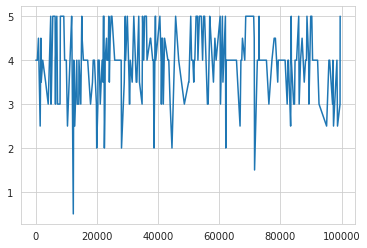

In [14]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro **kind** do método ```.plot```. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

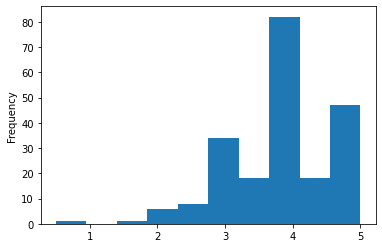

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Legal, agora temos uma visualização muito mais agradavel de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise? 

P.S: Deixar de usar o gráfico de linhas, não significa que sejá uma visualização ruim. Apenas quer dizer que nossos dados não tem características ideias para serem visualizados como um *line plot*, agora pense em uma [série temporal](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal). **Você acha que o gráfico de linhas ainda seria uma má ideia?**

Antes de analisar o histograms de outros filmes, quero colocar um título na imagem. Vamos ver como podemos fazer isso!


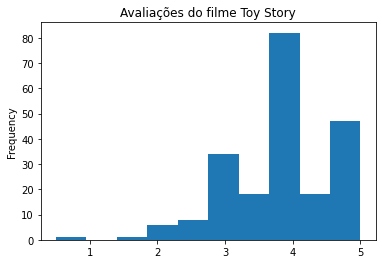

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

Claro que python tem outras ferramentas muito poderosas para manipular gráficos, uma delas é o [matplotlib](https://matplotlib.org/).

Que tal experimentar um pouquinho esta poderosa ferramenta? 

Vamos importar a lib e adicionar título no gráfico usando o matplotlib, veja como fica na célula a seguir.

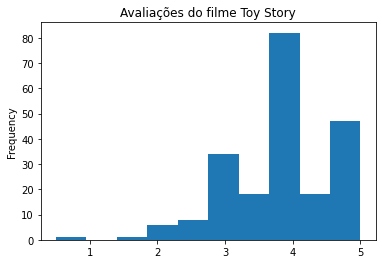

In [0]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Agora que aprendemos a criar um histograma e manipular os gráficos, vamos plotar informações de outros filmes e realizar uma análise desses gráficos?

Vamos plotar o histograma do filme Jumanji e da animação Liga da justiça: Doom.

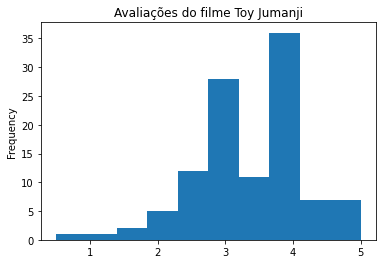

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

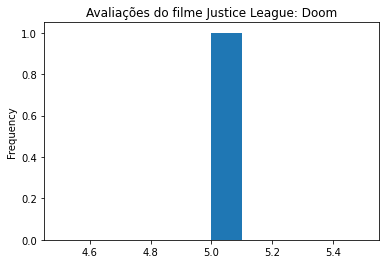

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

Agora que temos os gráficos, chegou a hora de analisar.

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa. Então, eixo **x** mostra a nota, enquanto eixo **y** a frequência das notas (quantas vezes determinada nota foi dada). 

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

 - Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro que nenhuma pessoa presente no momento da aula conhecia (animação da liga da justiça). O ponto que chamou a atenção, foi que a animação tinha média de nota maior que dois filmes, aparentemente mais popular, Jumaji e Toy Story. **Será que a animação é um filme tão bom assim?**


Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**.(Se ficar alguma dúvida sobre esse tema reveja o exemplo que o instrutor apresenta no final na aula) 


Com isso nós fechamos a nossa primeira aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!








## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

# Aula 02

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso Boxplot.

Para inciar vamos precisar resolver alguns dos desafios deixados na **aula 01** (Caso não tenha tentado resolver os desafios, recomendo tentar algumas vezes antes de olhar as repostas). Começando pelo exercício 05, onde precisamos segregar os gêneros de cada um dos filmes contidos na base de dados do **Movie Lens**.

Vamos relembrar como os dados estavam configurados.

In [15]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Temos os títulos e uma coluna com os respectivos gêneros, todos em uma única coluna, cada *label* é separada com um **|** (Adventure|Children|Fantasy) sendo do tipo *string*. 

Para solucionar nosso problema precisamos separar cada um dos gêneros para então realizar a contagem. Existe várias formas de resolver este problema, por exemplo, desde métodos inputs das *strings* até as **regex**, mas como estamos usando o pandas já temos algo para facilitar nosso processamento dos dados. 

Vamos aplicar o método e logo em seguida explicar a saída gerada.

In [10]:
filmes["generos"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nossa, uma linha de código gerou essa tabelona cheia de linhas, colunas e números.


Como você percebeu a saída é um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero **único** virou uma coluna no DF). O que você deve estar se perguntando é como os valores **0/1** são preenchidos?.

Para explicar, vamos pegar os gêneros do filme **Jumanji**, **Adventure|Children|Fantasy**, na coluna dos repectivos gêneros (dataframe gerado por ```filmes["generos"].str.get_dummies('|')```) o valor será **1**, para todos os outros gêneros, que não são gêneros do filme Jumanji, vale **0**. Em suma, se o nome da coluna pertence a algum gêreno do respectivo filme, o valor será **1** caso contrário 0 (Se ainda não ficou claro, pegue alguns filmes e confira os resultas na tabela anterior).


Até aqui resolvemos uma parte do problema, agora precisamo somar quantos **1** cada coluna tem.



In [11]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Ótimo, resolvemos o desafio e agora temos quantas vezes cada gênero aparece. Assim, fica fácil de reponder perguntar como, qual o gênero com mais filmes produzidos? Qual o menos? Qual o segundo? (Lembrando que o dado está restrito as informações do movie lens)

Se você tentou reponder, deve ter notado que não foi tão fácil assim, as informações não estão ordenadas e toda hora você precisa percorrer a tabela para fazer comparações. Nós podemos melhor isso ordenando as informações.

In [12]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [13]:
filmes['generos'].str.get_dummies('|').sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Maravilha, agora tudo ficou mais fácil! 

Conseguimos responder as perguntas anterior sem grandes dificuldades. Mas ainda podemos melhor mais a forma de expor nossa informação, não acha? 

Que tal uma imagem para visualizar? (Desafio 07 da aula 01)

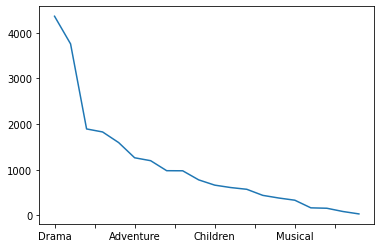

In [14]:
# Este gráfico não faz sentido para o tipo de dado
import matplotlib.pyplot as plt
import collections
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

Iniciamos com o plot padrão do pandas, e como percebemos não adianta só plotar uma imagem, é preciso que faça sentido para a informação que queremos analisar, um gráfico de linhas não está fazendo muito sentido!

Temos um gráfico muito conhecido que sempre encontramos por aí, o famoso gráfico de pizza ou torta. 

Já que ele é tão famoso talvez seja uma boa ideia tentar!

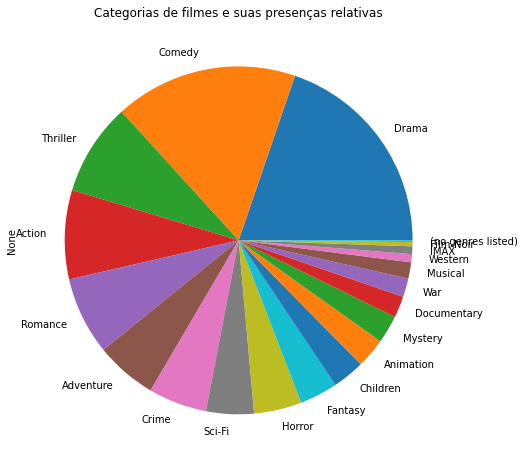

In [15]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

E aí o que você achou? 

Algo que fica evidente neste gráfico é que **Drama, Comedy, Thriller, e Action** tem proporções "grandes", mas qualquer outra análise fica complicada. 

Primeiro, as cores começa a se repetir e isso não é o ideial.

Segundo, repare nos gêneros com menos filmes,consegue tirar alguma informação de lá? é muito difícil de analisar.

Quarto, vamos tentar comparar **thriller e Action**, qual está presente em mais filmes? Difícil responder, quando estamos trabalhando com gráficos tipo esse fazemos comparações entre área, não somos bons nisso.


Por fim, o importante de uma visualização é que ela seja **"transparente"** ao intuíto de nossa análise. Ou seja, estamos querendo analisar as informações de quantidade, comparando as labels de forma geral e evidênciando de maneira clara as diferenças entre elas (proporções).

Portanto, o gráfico de pizza não torna as comparações claras, sendo assim uma má ideia. 

Vamos construir juntos uma solução mais adequada!


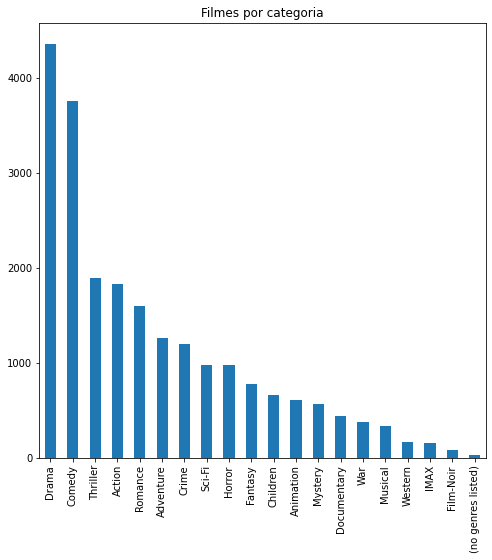

In [16]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

Mudamos da pizza para a barra, alterando apenas o parâmetro kind do método.

 Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre **Drama e Comedy**, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar **Thriller e Action**, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tprnar evidênte essa informação vamos utilizar algo "semelhante" a um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


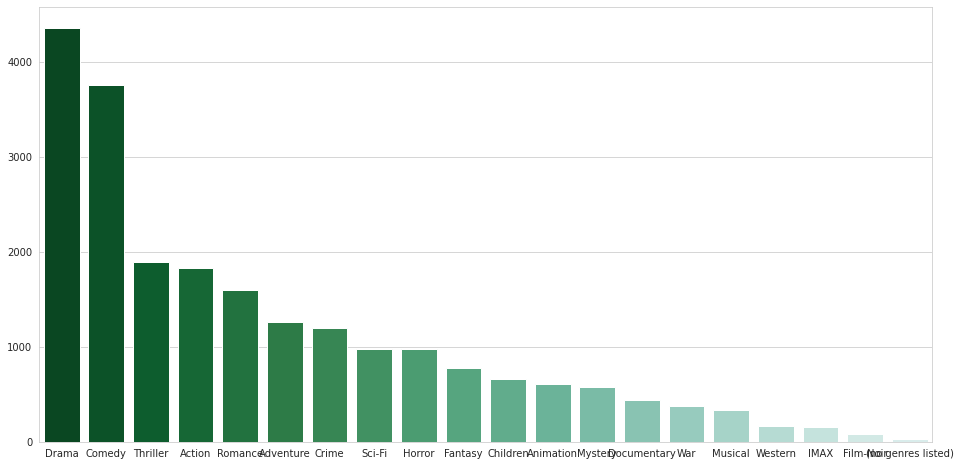

In [17]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Já, já explicamos o que foi feito em toda imagem, por agora repare como a imagem passa muito mais informação. Conseguimos comparar de forma fácil entre os gêneros e através do **mapa de calor** (gêneros com maior número tem um verde muito mais forte, gêneros com menor número é praticamente transparente) evidênciamos quais são as labels com maior participação, médias e insignificantes. Toda essa informação em uma única imagem!

Bom, agora vamos entender como foi o código.

Primeiro, não plotamos mais a imagem com o `.plot()` do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o [seaborn](https://seaborn.pydata.org/).

Segundo, chamamos o barplot do **seaborn**, adicionando uma **paleta de cores** com efeito de mapa de calor (parâmetro pallette), no parâmetro `n_color` de `sns.color_palette()` adicionamos **+4** para que a última barra não seja totalmente transparente.

Terceiro, também adicionamos o **sns.set_style("whitegrid")** para que todos os gráficos tenham a **linha de grade do eixo X** evidente, facilitando a comparação entre as barras.

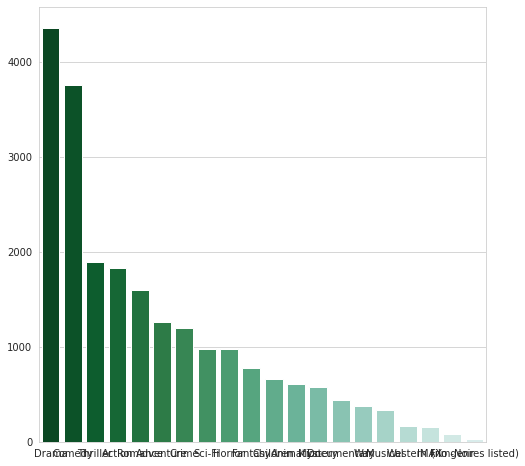

In [18]:
import seaborn as sns

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Por fim, mudamos o tamanho da imagem com o **figsize** do método`plt.figure()`. Assim, temos um gráfico com muitas informações e agradável de analisar.


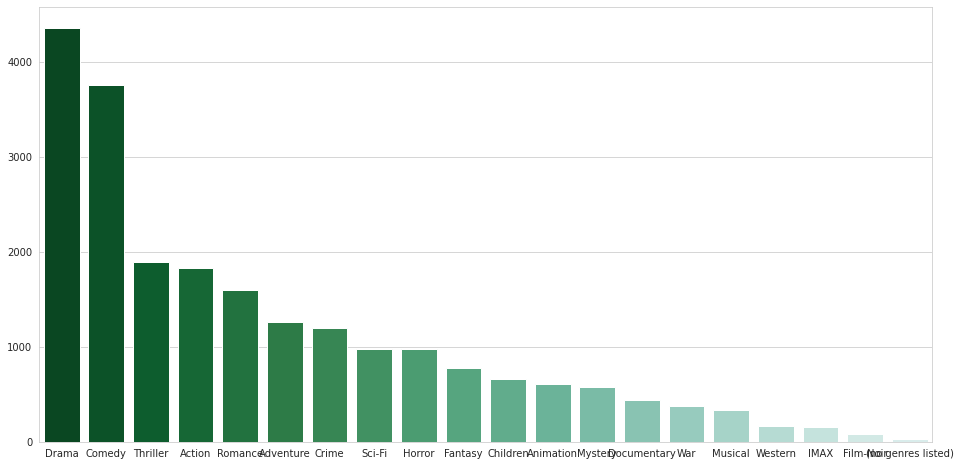

In [19]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na **aula 01** calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [20]:
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das ntoas para comparar alguns filmes. Por exemplo, **Toy Story e Jumanji**

3.9209302325581397


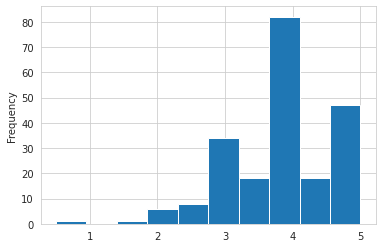

In [21]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


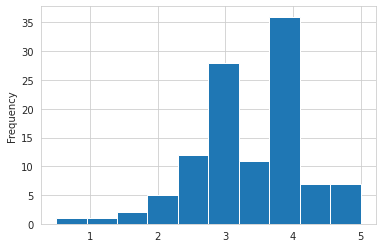

In [29]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados. 

Lembra o exemplo que o Guilherme Silveira deu em aula comparando os sálarios de uma cidade? Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades. 

```python
#Cidada A
populacao = 1000
salario = 1100

media = 1100

#Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100

media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00
```

P.S: Se tiver dúvidas reveja essa parte da aula e tente enteder o problema da média.


Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a [mediana](https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica))

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [22]:
filmes_com_media.sort_values("nota", ascending=False)[2850:2900]

,filmeId,titulo,generos,nota
3245,4387,Kiss of the Dragon (2001),Action,3.777778
2213,2941,South Pacific (1958),Musical|Romance|War,3.777778
4804,7158,House of Sand and Fog (2003),Drama,3.777778
1797,2396,Shakespeare in Love (1998),Comedy|Drama|Romance,3.777174
7090,70286,District 9 (2009),Mystery|Sci-Fi|Thriller,3.776923
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119
7894,94959,Moonrise Kingdom (2012),Comedy|Drama|Romance,3.775862
4012,5669,Bowling for Columbine (2002),Documentary,3.775862
61,69,Friday (1995),Comedy,3.775000
2038,2716,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi,3.775000


Bom, ordenando os filmes pela nota médias e [fatiando](https://www.alura.com.br/artigos/listas-no-python) os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime *Wizard of Oz, **filmeId=919** e *Little Miss Sunshine* **filmeId=46578**.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='bar')
  return notas_do_filme.describe()

Definimos nossa [função plot em python](https://www.caelum.com.br/apostila-python-orientacao-objetos/funcoes/#parmetros-de-funo) e repare que estamos usando **F-string** para fazer a interpolação dos dados, se tiver tiver dúvida veja essa [explicação no fórum da alura](https://cursos.alura.com.br/forum/topico-para-que-serve-o-print-f-no-python-77720).

Agora precisamos chamar a função!

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

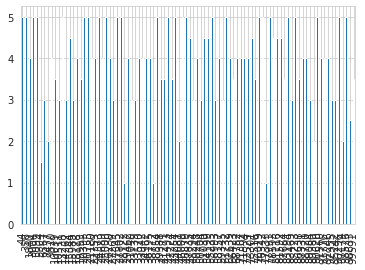

In [36]:
#Mágico de Oz
plot_filme(919)



A função plot, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a função agora para o filme *Little Miss Sunshine*.

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

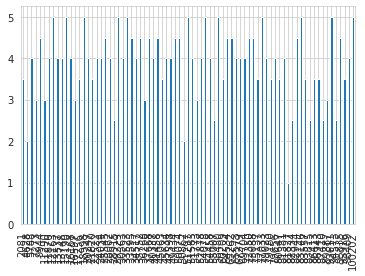

In [26]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

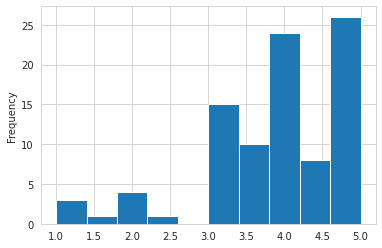

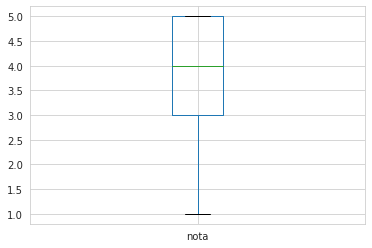

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [31]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

E aí, viu como é simples criar criar um [boxplot com o pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)?

Apenas chamamos o método ```.plot.box()```, agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.


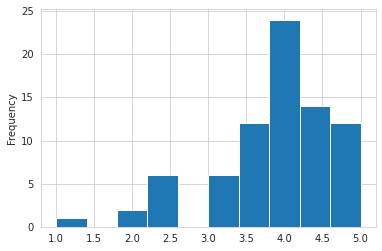

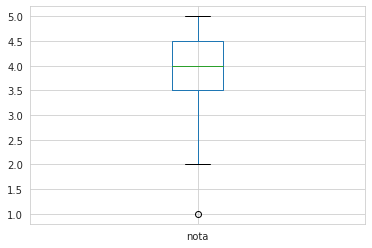

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [28]:
plot_filme(46578)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em **y=1**. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de [outliers](https://pt.wikipedia.org/wiki/Outlier), existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do [wikipedia](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o **seaborn**, para aprendermos outra forma de plotar boxplot!


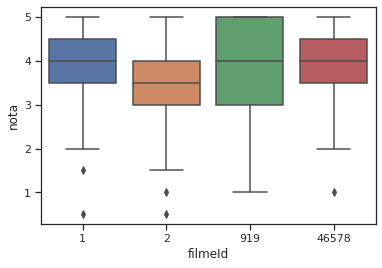

In [55]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")


Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o `.query()` para selecionar os dados), **x** é o Id do filme e **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais claram tente realiza a análise aí na sua casa!


Com isso nós fechamos nossa segunda aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!




##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

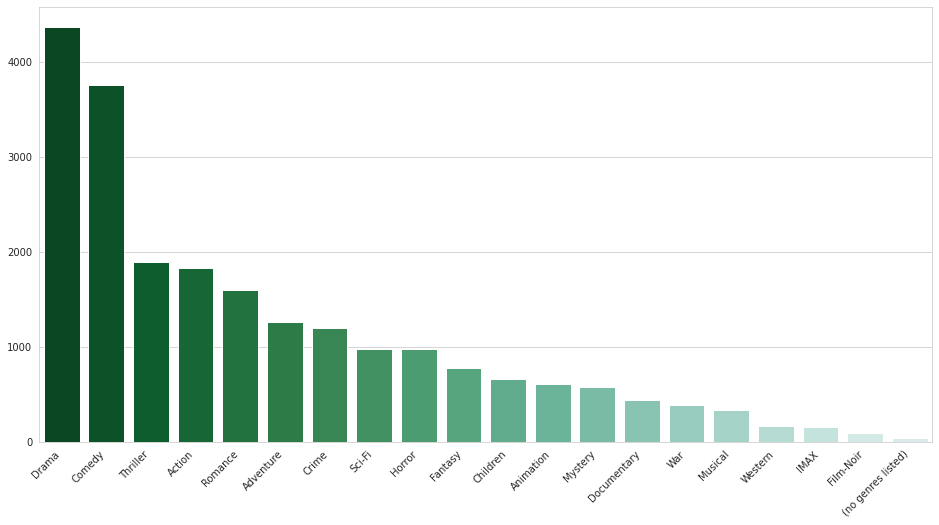

In [29]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))

sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()


## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

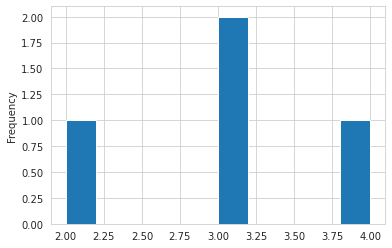

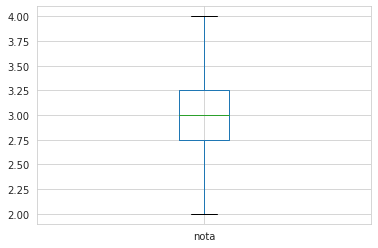

count    4.000000
mean     3.000000
std      0.816497
min      2.000000
25%      2.750000
50%      3.000000
75%      3.250000
max      4.000000
Name: nota, dtype: float64

In [33]:
plot_filme(3500) 

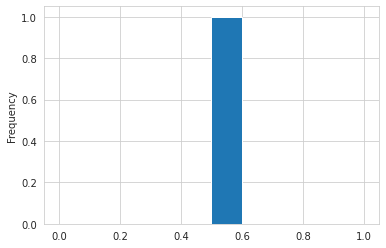

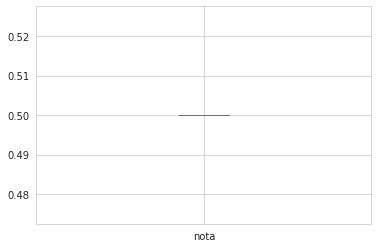

count    1.0
mean     0.5
std      NaN
min      0.5
25%      0.5
50%      0.5
75%      0.5
max      0.5
Name: nota, dtype: float64

In [37]:
plot_filme(5700) 

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

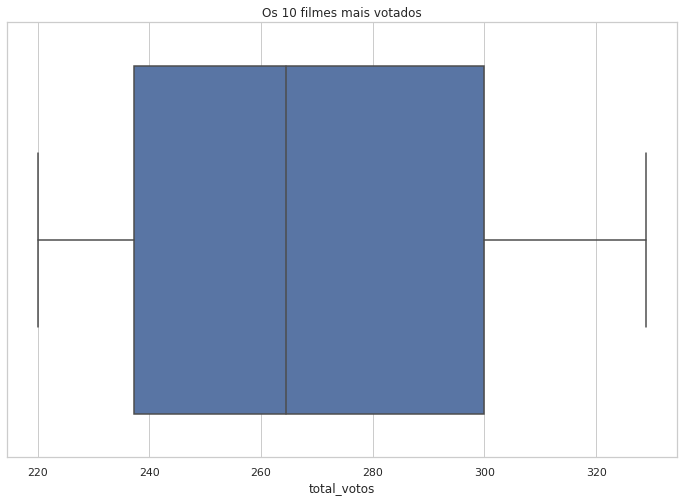

,filmeId,titulo,generos,nota_media,total_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


In [38]:
import numpy as np
total_notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})

filmes_com_media_total = filmes_com_media.join(total_notas_por_filme, on="filmeId")
filmes_com_media_total = filmes_com_media_total.rename(columns={'nota': 'total_votos'})

dez_primeiros_filmes_total_votos = filmes_com_media_total.sort_values("total_votos", ascending=False).head(10)

dez_primeiros_filmes_total_votos

sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
plt.title("Os 10 filmes mais votados")
ax = sns.boxplot(x=dez_primeiros_filmes_total_votos["total_votos"] )
plt.show()
dez_primeiros_filmes_total_votos

Analisando o gráfico e os dados da lista dos 10 filmes com mais votos, fica claro que não temos outliners (dados discrepantes), já que os votos estão bem distribuídos, isto é, temos uma distribuição normal. O valor da média e da mediana tem uma diferança média de 4 pontos.

Como a cultura de filmes intensifica a partir dos anos 70 com Tubarão e Star Wars (Steven Spielberg e George Lucas respectivamente), os famosos blockbusters, o único filme dos anos 70 é o próprio Star Wars com relevância nos votos, já que o restante dos filmes são todos dos anos 1990. O interessante desse aspecto, é que há uma vibe nostálgica dos anos 1980 na sociedade, porém não aparece nenhum filme entre os 10 primeiros mais votados.


## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

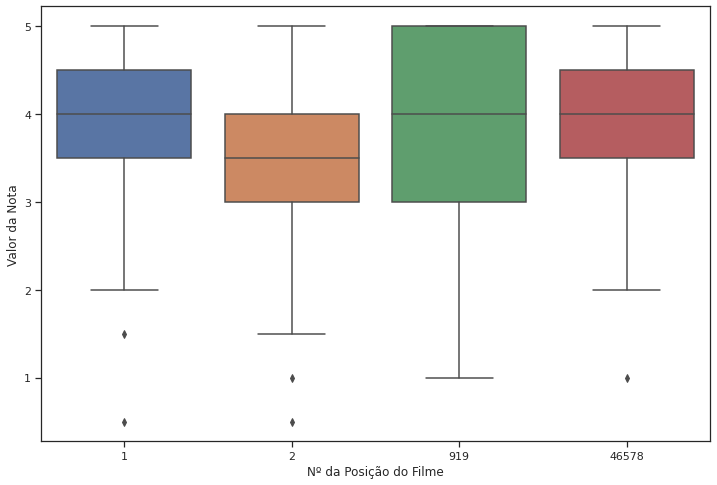

In [67]:
plt.figure(figsize=(12,8))

filmes_filtrados = avaliacoes.query("filmeId in [1,2,919,46578]")
sns.set(style="ticks")

g, axis = sns.boxplot(data = filmes_filtrados, x ="filmeId", y="nota").set(
    xlabel='Nº da Posição do Filme', 
    ylabel='Valor da Nota'
)

plt.show()


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


<Figure size 432x288 with 0 Axes>

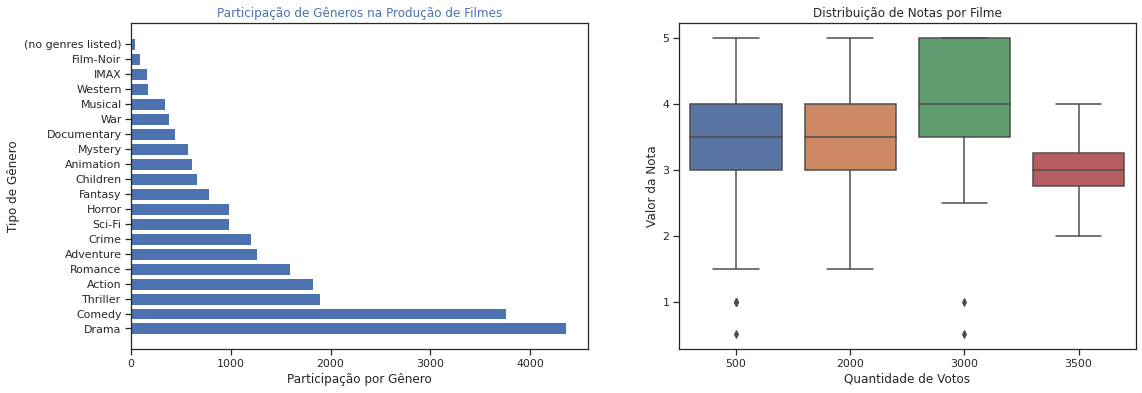

In [71]:
fig = plt.figure(tight_layout=True)
x1 = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).index
y1 = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].set_title('Participação de Gêneros na Produção de Filmes'.format('seaborn'), color='C0')
axes[0].set_ylabel('Tipo de Gênero')
axes[0].set_xlabel('Participação por Gênero')
axes[0].barh(x1, y1)

plt.title('Distribuição de Notas por Filme')
sns.boxplot(data = avaliacoes.query("filmeId in [500,2000,3000,3500]"), x ="filmeId", y="nota").set(
    xlabel='Quantidade de Votos', 
    ylabel='Valor da Nota'
)

plt.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
dados = filmes_com_media_total['titulo']
dados = dados.str.split('(')
ano_lancamento = []

for x in range(len(dados)):
  value = dados[x][-1].split(')')[0]
  
  if value.isnumeric():
    ano_lancamento.append(value)
  else:
    ano_lancamento.append(0)

filmes_com_media_total['ano'] = ano_lancamento
filmes_com_media_total['ano'] = filmes_com_media_total['ano'].astype('int64', copy=False)

def get_plot_media(ano):

  sns.set_style("whitegrid")
  media_filmes_ano = filmes_com_media_total.query('ano == ' + str(ano))
  plt.figure(figsize=(16,8))

  sns.barplot(x=media_filmes_ano.titulo,
              y=media_filmes_ano.nota_media,
              palette=sns.color_palette("Blues"))
  locs, labels = plt.xticks()
  plt.setp(labels, rotation=45, horizontalalignment='right')
  plt.show()





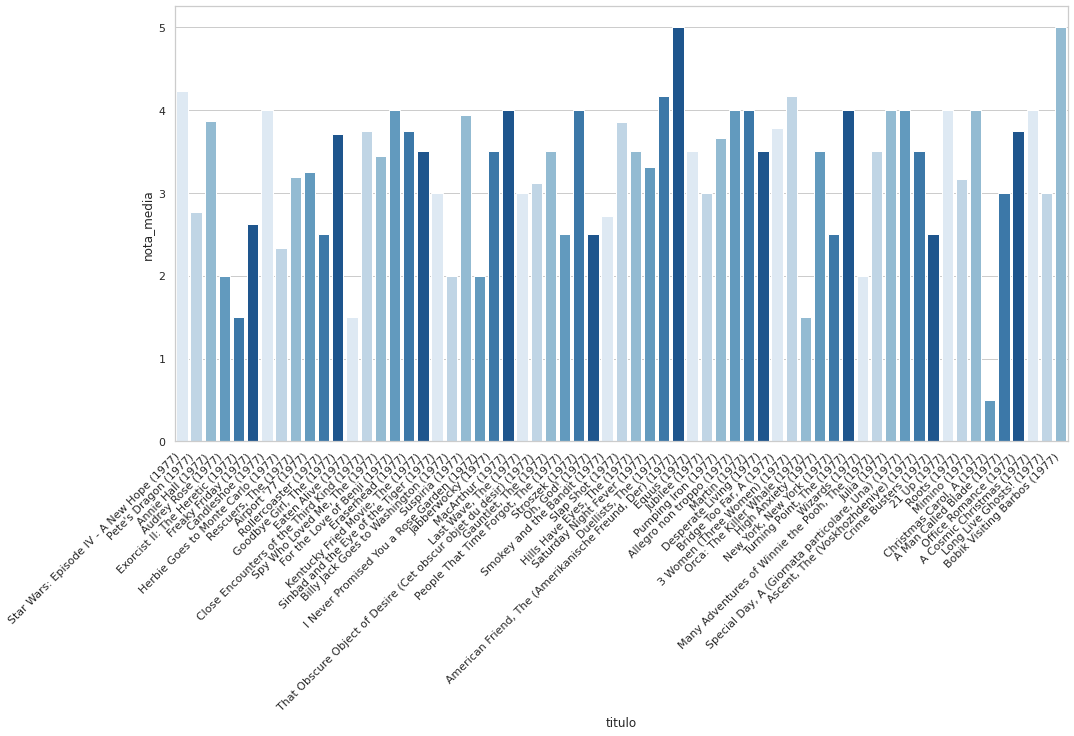

In [91]:
ano = 1977
get_plot_media(ano)

In [92]:
filmes_com_media_total


,filmeId,titulo,generos,nota_media,total_votos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,1995
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0,2017
9739,193585,Flint (2017),Drama,3.500000,1.0,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0,2018


#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!